In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_train_path = r"C:\Users\Jiya Sharma\Dropbox\PC\Desktop\hh\b\train"
data_train_test = r"C:\Users\Jiya Sharma\Dropbox\PC\Desktop\hh\b\test"
data_train_val = r"C:\Users\Jiya Sharma\Dropbox\PC\Desktop\hh\b\valid"

img_width = 180
img_height = 180

# Data Augmentation
data_augmentation = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

# Training Data
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

# Validation Data
data_val = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

# Test Data
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_test,
    image_size=(img_width, img_height),
    batch_size=32,
    shuffle=False,
)

# Model
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),  # Increased dropout rate
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dense(len(data_train.class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

epochs_size = 100
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    callbacks=[early_stopping]
)



Found 988 files belonging to 2 classes.
Using 791 files for training.
Found 988 files belonging to 2 classes.
Using 197 files for validation.
Found 101 files belonging to 2 classes.


Epoch 1/100


25/25 [==============================] - 10s 258ms/step - loss: 0.6954 - accuracy: 0.7029 - val_loss: 0.6041 - val_accuracy: 0.8223
Epoch 2/100
25/25 [==============================] - 6s 244ms/step - loss: 0.2853 - accuracy: 0.9014 - val_loss: 0.5325 - val_accuracy: 0.8274
Epoch 3/100
25/25 [==============================] - 6s 243ms/step - loss: 0.2181 - accuracy: 0.9241 - val_loss: 0.4966 - val_accuracy: 0.8376
Epoch 4/100
25/25 [==============================] - 6s 242ms/step - loss: 0.2187 - accuracy: 0.9178 - val_loss: 0.4246 - val_accuracy: 0.8173
Epoch 5/100
25/25 [==============================] - 6s 242ms/step - loss: 0.2167 - accuracy: 0.9178 - val_loss: 0.4000 - val_accuracy: 0.8579
Epoch 6/100
25/25 [==============================] - 6s 244ms/step - loss: 0.1748 - accuracy: 0.

7/7 [==============================] - 1s 43ms/step
Confusion Matrix:
[[  9  28]
 [ 27 133]]
Accuracy: 0.7208121827411168


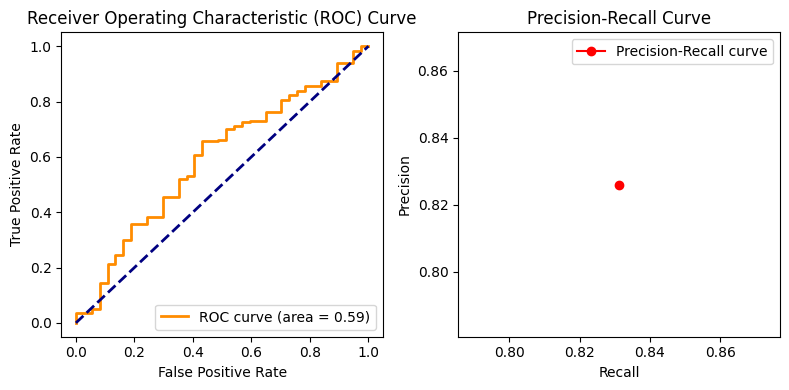

In [2]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted labels for the validation set
y_pred = model.predict(data_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in data_val], axis=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
print("Accuracy:", accuracy)

# ROC Curve (for binary classification)
fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])  # Assuming binary classification, adjust accordingly
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve (for binary classification)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='o', color='r', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()


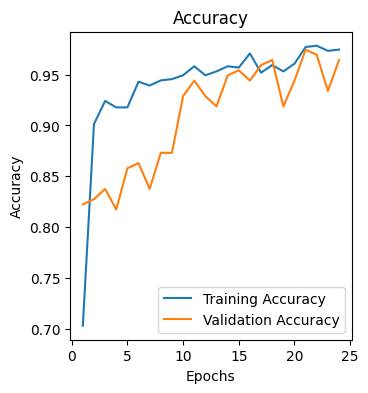

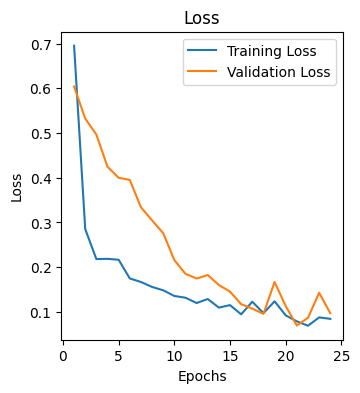

In [27]:
epochs_range = range(1, len(history.history['accuracy']) + 1)  # Fix here
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
epochs_range = range(1, len(history.history['accuracy']) + 1)  # Fix here
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

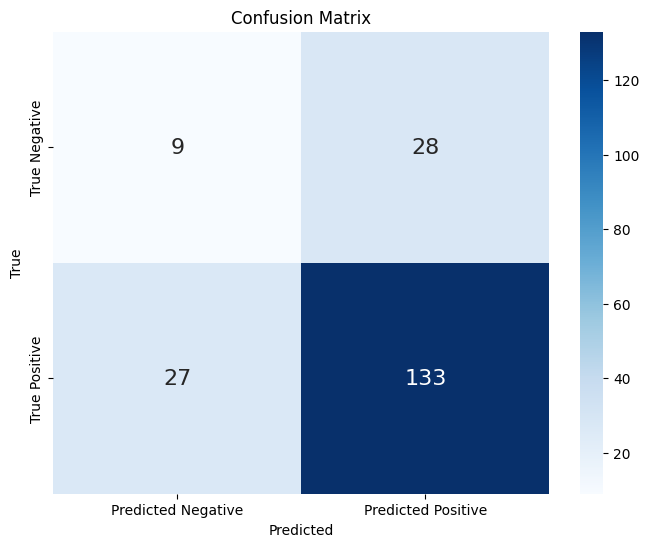

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_matrix = [
    [9, 28],
    [27, 133]
]
conf_matrix_np = np.array(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_np, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0.5, 1.5], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0.5, 1.5], ['True Negative', 'True Positive'])
plt.show()


In [6]:
model.save(r"C:\Users\Jiya Sharma\Dropbox\PC\Desktop\hh\b\bone_model_100_epo.keras")

In [26]:
data_cat = data_train.class_names
image_path = r"C:\Users\Jiya Sharma\Dropbox\PC\Downloads\Screenshot 2024-01-31 175554.png"

# Load and preprocess the image
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_arr = tf.keras.utils.img_to_array(image)
img_bat = tf.expand_dims(img_arr, 0)
img_bat /= 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_bat)
score = tf.nn.softmax(prediction)

# Check the prediction
if data_cat[np.argmax(score)] == "NORMAL":
    print('Abnormal')
else:
    print('Normal')
# Print the result and confidence
print('Abnormality/Normal detection in the image is {} with confidence of {:.2%}'.format(data_cat[np.argmax(score)], np.max(score)))


1/1 [==============================] - 0s 48ms/step
Abnormal


AttributeError: 'str' object has no attribute 'np'

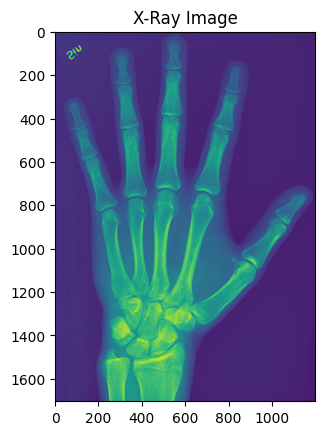

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_path = r"C:\Users\Jiya Sharma\Dropbox\PC\Desktop\CVISION\test_normal_external.jpg"

# Display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.title('X-Ray Image')
plt.show()


In [28]:
y_pred_classes

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
      dtype=int64)